## 0. Import the Packages

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


## 1. Load the Exam score data

In [2]:
data1 = pd.read_csv("./ex2data1.csv")

In [3]:
data1.columns = ['Exam_Score1', 'Exam_Score2', 'Labels']

In [4]:
data1.head(5)

,Exam_Score1,Exam_Score2,Labels
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


In [5]:
data2 = pd.read_csv("./ex2data2.txt")

In [6]:
data2.columns = ['Exam_Score1', 'Exam_Score2', 'Labels']

## 2. Plotting a Exam score data

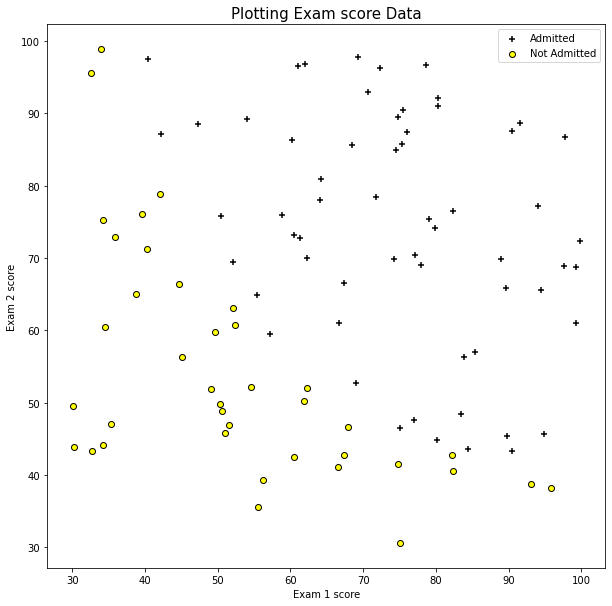

In [7]:
plt.figure(figsize=(10,10))
admitted = data1[data1['Labels'] == 1]
notAdmitted = data1[data1['Labels'] == 0]

admitted_s = plt.scatter(admitted["Exam_Score1"], admitted["Exam_Score2"], marker= "+", color  = "black")
notAdmitted_s = plt.scatter(notAdmitted["Exam_Score1"], notAdmitted["Exam_Score2"], marker = "o", color = "yellow", edgecolors= "black")

plt.legend((admitted_s, notAdmitted_s), ("Admitted", "Not Admitted"), loc = "upper right")

plt.title("Plotting Exam score Data", fontsize = 15)

plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")

plt.show()

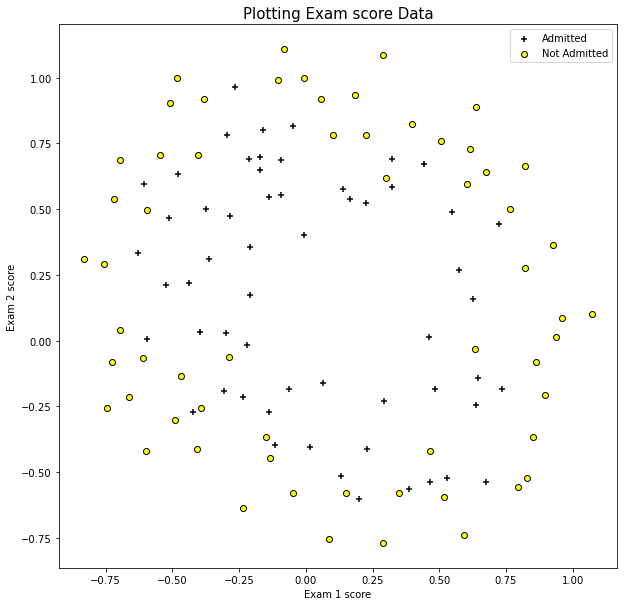

In [8]:
plt.figure(figsize=(10,10))
admitted = data2[data2['Labels'] == 1]
notAdmitted = data2[data2['Labels'] == 0]

admitted_s = plt.scatter(admitted["Exam_Score1"], admitted["Exam_Score2"], marker= "+", color  = "black")
notAdmitted_s = plt.scatter(notAdmitted["Exam_Score1"], notAdmitted["Exam_Score2"], marker = "o", color = "yellow", edgecolors= "black")

plt.legend((admitted_s, notAdmitted_s), ("Admitted", "Not Admitted"), loc = "upper right")

plt.title("Plotting Exam score Data", fontsize = 15)

plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")

plt.show()

## 3. Model Setting

In [9]:
trainEx1 = np.array(data1["Exam_Score1"], dtype=float)
trainEx2 = np.array(data1["Exam_Score2"], dtype=float)
trainFeatures = np.stack((trainEx1, trainEx2), 1)
trainLabels = np.array(data1["Labels"], dtype=int)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(trainFeatures, trainLabels, test_size=0.2)

In [11]:
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(units=64, activation='relu', input_shape=(2,)),
                            tf.keras.layers.Dense(units=32, activation='relu'),
                            tf.keras.layers.Dense(units=24, activation='relu'),
                            tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),
            loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 24)                792       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 3,089
Trainable params: 3,089
Non-trainable params: 0
_________________________________________________________________


2022-10-02 19:15:17.311576: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-02 19:15:17.311685: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## 4. Model fitting

In [12]:
history = model.fit(x_train, y_train, epochs=100, batch_size=20, validation_split= 0.25)

Epoch 1/100


2022-10-02 19:15:35.413898: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-02 19:15:35.600951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 79ms/step - loss: 38.7373 - accuracy: 0.4407 - val_loss: 0.8478 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.9296 - accuracy: 0.6271 - val_loss: 0.7482 - val_accuracy: 0.4500
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6394 - accuracy: 0.5932 - val_loss: 0.6886 - val_accuracy: 0.6000
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6897 - accuracy: 0.6441 - val_loss: 0.6973 - val_accuracy: 0.4500
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6764 - accuracy: 0.6441 - val_loss: 0.7116 - val_accuracy: 0.4500
Epoch 6/100


2022-10-02 19:15:35.898054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 15ms/step - loss: 0.6650 - accuracy: 0.6271 - val_loss: 0.7406 - val_accuracy: 0.4500
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6624 - accuracy: 0.6271 - val_loss: 0.7757 - val_accuracy: 0.4500
Epoch 8/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6647 - accuracy: 0.6271 - val_loss: 0.7942 - val_accuracy: 0.4500
Epoch 9/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6652 - accuracy: 0.6271 - val_loss: 0.7770 - val_accuracy: 0.4500
Epoch 10/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6641 - accuracy: 0.6271 - val_loss: 0.7580 - val_accuracy: 0.4500
Epoch 11/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6612 - accuracy: 0.6271 - val_loss: 0.7477 - val_accuracy: 0.4500
Epoch 12/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6608 - accuracy: 0.6271 - val_loss: 0.7436 - val_accuracy: 0.4500
Epoch 13/100
3/3 [===========

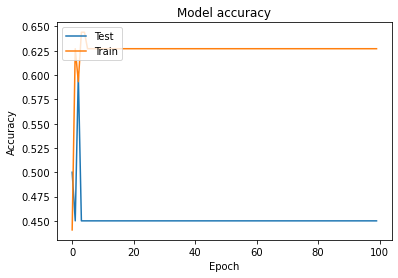

In [13]:

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Test', 'Train'], loc='upper left')
plt.show()

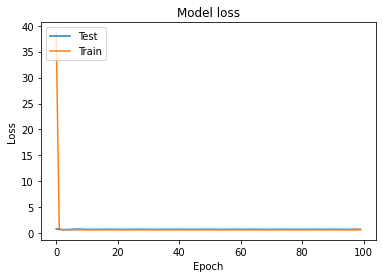

In [14]:

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Test', 'Train'], loc='upper left')
plt.show()

## 5. Model Prediction (Test)

2022-10-02 19:18:55.239859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


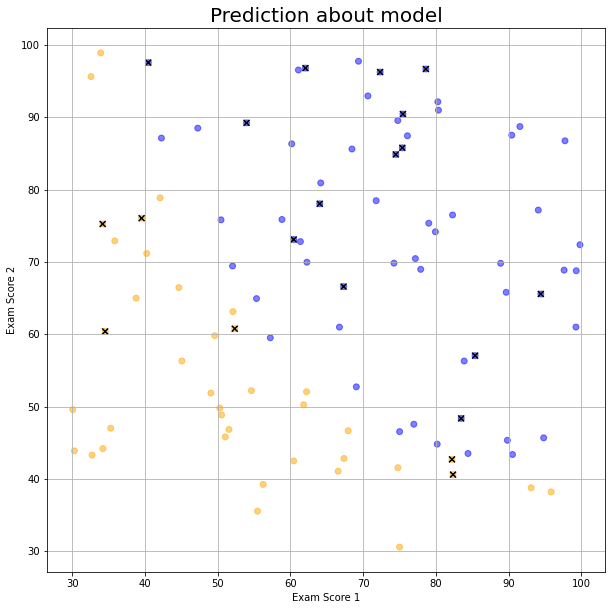

In [16]:
predictedLabels = model.predict(x_test)
predictedLabels = [int(label >= 0.5) for label in predictedLabels]

colors = ['red', 'black']
colors1 =['orange', 'blue']
colorsList = [colors1[int(label)] for label in trainLabels]
colorsListPredicted = [colors[label] for label in predictedLabels]

plt.figure(figsize=(10,10))
plt.scatter(trainEx1, trainEx2, c=colorsList, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=colorsListPredicted, marker='x')
plt.title("Prediction about model", fontsize = 20)
plt.xlabel('Exam Score 1')
plt.ylabel('Exam Score 2')
plt.grid()
plt.show()

In [21]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    reduced_data = X[:, :2]
    model = model_class(**model_params)
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    return plt

/var/folders/5h/f5j48qs1681606417fqnrggw0000gn/T/ipykernel_6695/4209813315.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0], y=X[y==cl,1],


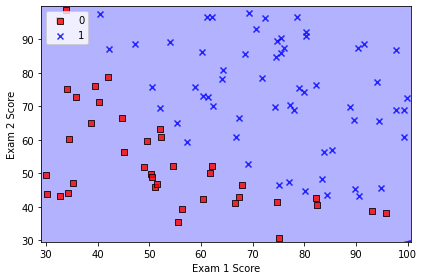

In [22]:
X_combined_std = np.vstack((x_train, x_test))
# 왼쪽에서 오른쪽으로 붙이기
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std,
                     y=y_combined,
                     classifier=model)
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()